In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from paths import *
from misc_tools import *

In [4]:
guide_path = src_ + "guide_mod.csv"

In [3]:
df = pd.read_csv(guide_path)

In [5]:
df = df[df["nSample"] > 400]
df = df[df["nSample"] <= 8000]

In [6]:
# Apply the vowelconsonant function to create a new column 'category'
df['category'] = df['segment_nostress'].apply(ARPABET.vowel_consonant)
# Count the number of vowels and consonants
counts = df['category'].value_counts()

In [7]:
print(counts)
"""
category
consonant    2153541
vowel        1374475
nap           193994
Name: count, dtype: int64
"""

category
consonant    2132503
vowel        1360946
nap           154092
Name: count, dtype: int64


'\ncategory\nconsonant    2153541\nvowel        1374475\nnap           193994\nName: count, dtype: int64\n'

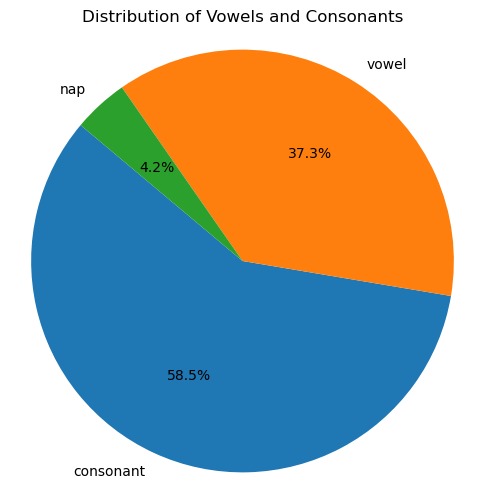

In [8]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the chart title
plt.title('Distribution of Vowels and Consonants')

# Display the pie chart
plt.show()

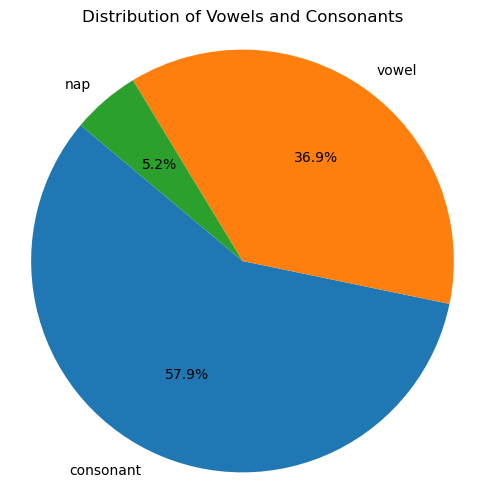

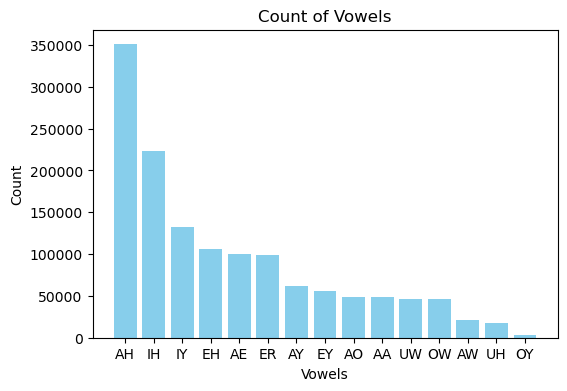

In [9]:
# Filter and count only the vowels
vowel_counts = df[df['category'] == 'vowel']["segment_nostress"].value_counts()

# Create a bar graph for vowels
plt.figure(figsize=(6, 4))
plt.bar(vowel_counts.index, vowel_counts.values, color='skyblue')
plt.xlabel('Vowels')
plt.ylabel('Count')
plt.title('Count of Vowels')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display the bar graph
plt.show()

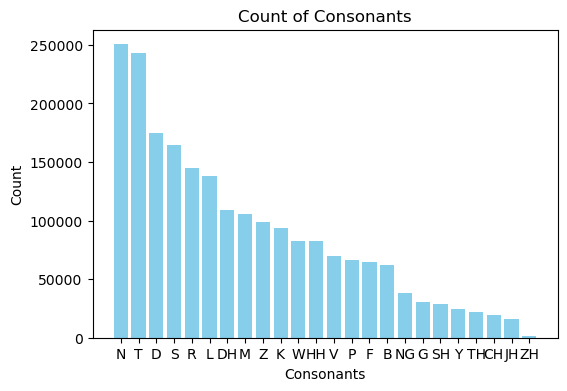

In [10]:
# Filter and count only the vowels
vowel_counts = df[df['category'] == 'consonant']["segment_nostress"].value_counts()

# Create a bar graph for vowels
plt.figure(figsize=(6, 4))
plt.bar(vowel_counts.index, vowel_counts.values, color='skyblue')
plt.xlabel('Consonants')
plt.ylabel('Count')
plt.title('Count of Consonants')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display the bar graph
plt.show()

In [20]:
df['duration'] = df['endTime'] - df['startTime']

In [32]:
# Calculate percentiles
percentiles = np.percentile(df['duration'], [90, 95, 99, 99.9, 99.99, 99.999])

# Print the calculated percentiles
print(f'90th Percentile: {percentiles[0]:.2f}')
print(f'95th Percentile: {percentiles[1]:.2f}')
print(f'99th Percentile: {percentiles[2]:.2f}')
print(f'99.9th Percentile: {percentiles[3]:.2f}')
print(f'99.99th Percentile: {percentiles[4]:.2f}')
print(f'99.999th Percentile: {percentiles[5]:.2f}')

90th Percentile: 0.16
95th Percentile: 0.21
99th Percentile: 0.51
99.9th Percentile: 1.26
99.99th Percentile: 2.16
99.999th Percentile: 3.30


In [37]:
# Count the number of durations greater than 1
over_1_count = (df['duration'] > 1).sum()

# Calculate the total number of durations
total_count = len(df)

# Calculate the percentage of durations over 1
percentage_over_1 = (over_1_count / total_count) * 100

# Print the percentage
print(f'Percentage of durations over 1: {percentage_over_1:.2f}%')

Percentage of durations over 1: 0.21%


In [33]:
# Filter the data to exclude values greater than 1
filtered_duration = df[df['duration'] <= 1]['duration']

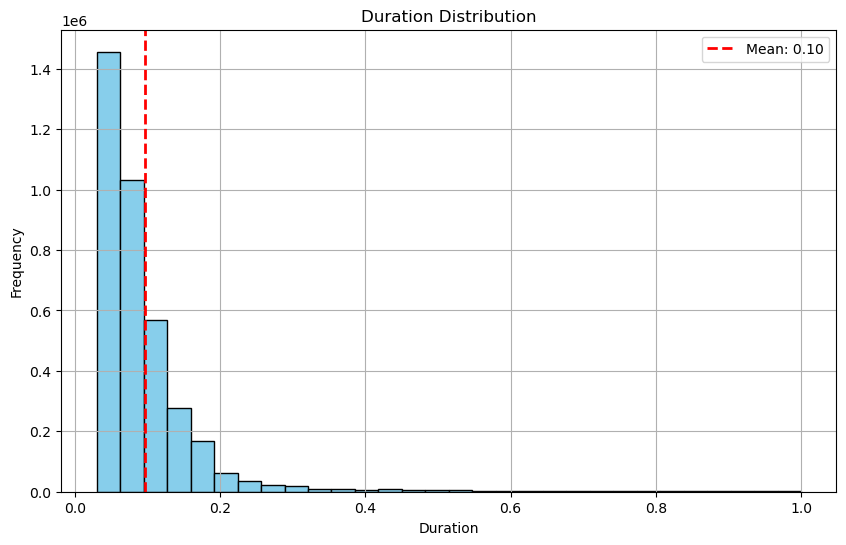

In [36]:
# Create a histogram of the duration distribution
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(filtered_duration, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration Distribution')

# Calculate and mark the mean on the histogram
mean_duration = df['duration'].mean()
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_duration:.2f}')
plt.legend()

# Display the histogram
plt.grid(True)
plt.show()

In [2]:
import random

In [5]:
df = pd.read_csv(guide_path)

In [6]:
df = df[df["nSample"] > 400]
df = df[df["nSample"] <= 8000]

In [7]:
select = ["N", "T", "D", "S", "R", "L", "DH"]
df = df[df["segment_nostress"].isin(select)]

In [8]:
df

,segment,file,id,startTime,endTime,nSample,segment_nostress,stress_type
4,T,103-1240-0000,4,0.70,0.75,800,T,SNA
8,N,103-1240-0000,8,1.01,1.11,1600,N,SNA
12,S,103-1240-0000,12,1.60,1.68,1280,S,SNA
15,R,103-1240-0000,15,1.83,1.90,1120,R,SNA
19,L,103-1240-0000,19,2.13,2.17,640,L,SNA
...,...,...,...,...,...,...,...,...
3685856,D,911-130578-0020,65,6.58,6.66,1280,D,SNA
3685859,N,911-130578-0020,68,7.19,7.26,1120,N,SNA
3685860,D,911-130578-0020,69,7.26,7.29,480,D,SNA
3685866,S,911-130578-0020,75,7.62,7.70,1280,S,SNA


In [9]:
def balance_dataframe(df, tag_column):
    """
    Balance the dataset in a Pandas DataFrame by randomly reducing the number of samples for each tag to match the minimum number of samples.

    Parameters:
    - df: Pandas DataFrame containing audio samples and corresponding tags.
    - audio_column: Name of the column containing audio samples in the DataFrame.
    - tag_column: Name of the column containing tags in the DataFrame.

    Returns:
    - balanced_df: Pandas DataFrame with a balanced number of samples for each tag.
    """
    # Find the minimum number of samples for any tag
    min_samples = min(df[tag_column].value_counts())

    # Create a dictionary to store indices of samples for each tag
    tag_indices = {tag: df.index[df[tag_column] == tag].tolist() for tag in df[tag_column].unique()}

    # Randomly select indices to keep for each tag to balance the dataset
    balanced_indices = []
    for tag, indices in tag_indices.items():
        balanced_indices.extend(random.sample(indices, min_samples))

    # Create balanced DataFrame using the selected indices
    balanced_df = df.loc[balanced_indices].reset_index(drop=True)

    return balanced_df

In [12]:
balanced_df = balance_dataframe(df, "segment_nostress")

In [13]:
segment_counts = balanced_df['segment_nostress'].value_counts()
print(segment_counts)

segment_counts = df['segment_nostress'].value_counts()
print(segment_counts)

segment_nostress
T     108849
N     108849
S     108849
R     108849
L     108849
D     108849
DH    108849
Name: count, dtype: int64
segment_nostress
N     250416
T     243335
D     174894
S     164732
R     144585
L     137977
DH    108849
Name: count, dtype: int64
